In [ ]:
from tools import *
plt.ion()
from matplotlib import patches, lines, text
d = load_data()
%config InlineBackend.figure_format = 'retina'

# Magnitude and angles

In [ ]:
def find_mag_ang(x, z):
    mag = np.sqrt(x**2 + z**2)
    arctan = np.arctan(z/x) * 180 / np.pi
    arcsin = np.arcsin(z/mag) * 180 / np.pi
    arccos = np.arccos(x/mag) * 180 / np.pi
    
    if x > 0 and z > 0:
        ang = np.arctan(z/x) * 180/np.pi
    elif x < 0 and z > 0:
        ang = 180 + np.arctan(z/x) * 180/np.pi
    elif x < 0 and z < 0:
        ang = 180 + np.arctan(z/x) * 180/np.pi
    elif x > 0 and z < 0:
        ang = 2 * 180 + np.arctan(z/x) * 180/np.pi
    
    return(mag, ang, arctan, arcsin, arccos)

In [ ]:
trial = d['P11']['trials']['t41']

print trial['name']
x = trial['index8x'][-1] - trial['objectx'][-1]
z = trial['index8z'][-1] - trial['objectz'][-1] - 0.02
mag, ang, arctan, arcsin, arccos = find_mag_ang(x, z)

print 'Magnitude = {}'.format(mag)
print 'Angle     = {}'.format(ang)
print '-----'
print 'arctan(t) = {}'.format(arctan)
print 'arcsin(t) = {}'.format(arcsin)
print 'arccos(t) = {}'.format(arccos)


In [ ]:
style.use('ggplot')
fig = plt.figure(figsize = (5,5))
ax1 = fig.add_subplot(111)

ind_x = trial['index8x'][-1]
ind_z = trial['index8z'][-1]
obj_x = trial['objectx'][-1]
obj_z = trial['objectz'][-1]

xl, xr = obj_x - 0.1, obj_x + 0.1
yb, yt = obj_z - 0.1, obj_z + 0.1
asp = (xr - xl) / (yt - yb)

ax1.add_patch(patches.Rectangle( (obj_x - 0.02, obj_z - 0.02), 0.04, 0.04, color = [0.8, 0.8, 0.8]) )
ax1.add_line(lines.Line2D([ind_x, obj_x], [ind_z, obj_z + 0.02], linewidth = 1))
ax1.plot(ind_x, ind_z, 'rx')
ax1.plot(obj_x, obj_z + 0.02, 'rx')
ax1.plot(obj_x, obj_z,'k+')

ax1.set_xlim(xl, xr)
ax1.set_ylim(yb, yt)
ax1.set_aspect(asp)
ax1.set_title(trial['name'])
ax1.text(xr + 0.02, yt - 0.06, 'Magnitude = {}\nAngle = {}\n\narctan = {}\narcsin = {}\narccos = {}'\
         .format(np.round(mag, 4)*100, np.round(ang, 2), np.round(arctan, 2), np.round(arcsin, 2), np.round(arccos, 2)))

# Results 5 June

In [1]:
from tools import *
import pandas as pd
import seaborn as sns
from matplotlib import cm
from scipy.stats import ks_2samp
style.use('ggplot')
d = manual_load_data('clean_data.pkl')
%config InlineBackend.figure_format = 'retina'

In [103]:
markers = {}
markers['P07'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P08'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P09'] = {'index': 'index7', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P11'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P12'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P16'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist12'}
markers['P18'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P19'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}

pd.DataFrame(markers)

,P07,P08,P09,P11,P12,P16,P18,P19
index,index8,index8,index7,index8,index8,index8,index8,index8
thumb,thumb9,thumb9,thumb9,thumb9,thumb9,thumb9,thumb9,thumb9
wrist,wrist11,wrist11,wrist11,wrist11,wrist11,wrist12,wrist11,wrist11


## Distance to object's centre for index & gaze

In [3]:
long_table = pd.DataFrame(columns = ['participant', 'condition', 'indx-obj', 'gaze-obj'])

for name, subj in d.items():
    indx = markers[name]['index'] + 'x'
    for trial in subj['trials'].values():
        
        x1 = trial[indx][-1] - trial['objectx'][-1]
        x2 = trial['averagexeye'][-1] - trial['objectx'][-1]
        
        if 'RightToLeft' in trial['name']:
            x1 *= -1
            x2 *= -1
            
        cond = trial['name'][6:-4]
        
        to_add = pd.Series([name, cond, x1, x2], long_table.columns.values.tolist())
        long_table = long_table.append(to_add, ignore_index = True)

In [4]:
inter1 = long_table.groupby(['participant', 'condition']).aggregate(np.mean)
inter2 = inter1.reset_index(level = ['condition'])
meanPerCondition = inter2.groupby('condition').aggregate(np.mean)

meanPerCondition

,indx-obj,gaze-obj
condition,,
Occlusion_Cue_LeftToRight,-0.063727,-0.067053
Occlusion_Cue_RightToLeft,-0.058095,-0.068552
Occlusion_NoCue_LeftToRight,-0.064395,-0.070124
Occlusion_NoCue_RightToLeft,-0.062168,-0.069468
Visible_Cue_LeftToRight,-0.012636,-0.026843
Visible_Cue_RightToLeft,-0.004167,-0.004445
Visible_NoCue_LeftToRight,-0.011450,-0.033391
Visible_NoCue_RightToLeft,-0.004883,-0.006831


In [5]:
inter3 = inter1.reset_index(level = ['participant', 'condition'])
anovaTable = inter3.pivot(index = 'participant', columns = 'condition', values = 'indx-obj')

### Accuracy per condition

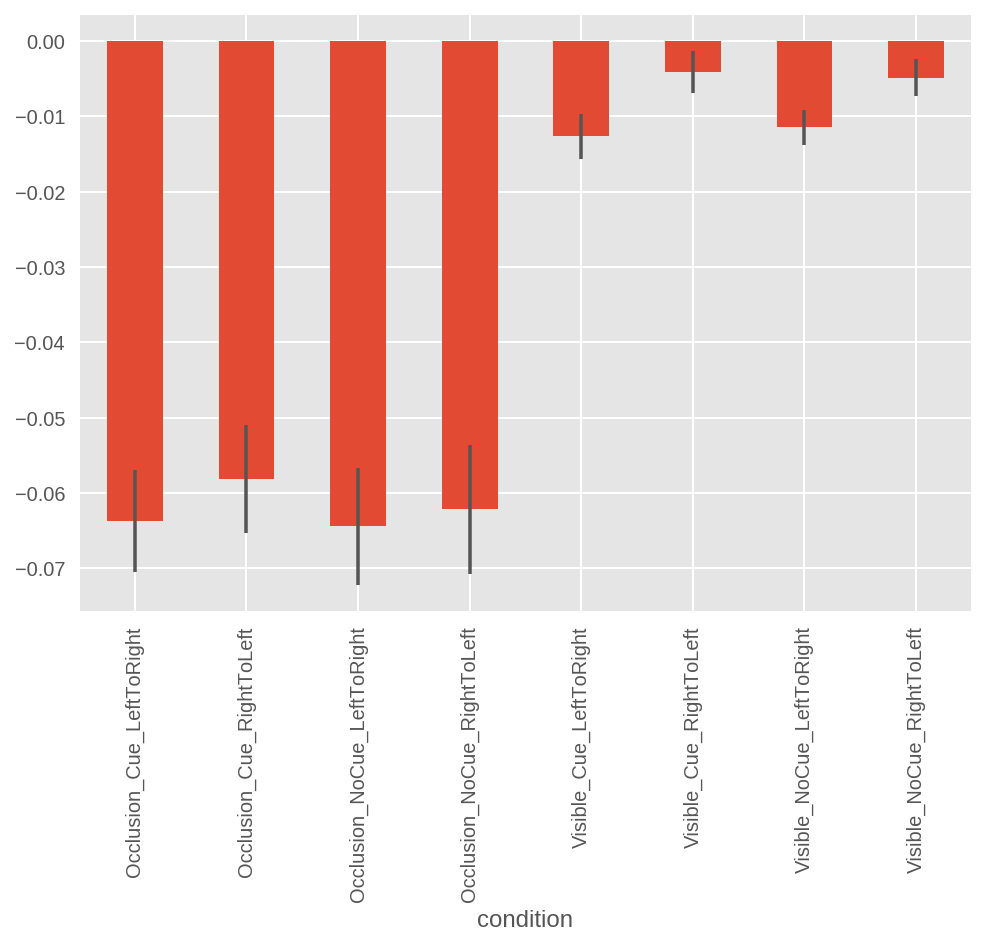

In [6]:
anovaTable.mean(axis = 0).plot(kind = 'bar', yerr = anovaTable.std(axis = 0) / np.sqrt(len(anovaTable)))
plt.show()

### Accuracy per participant

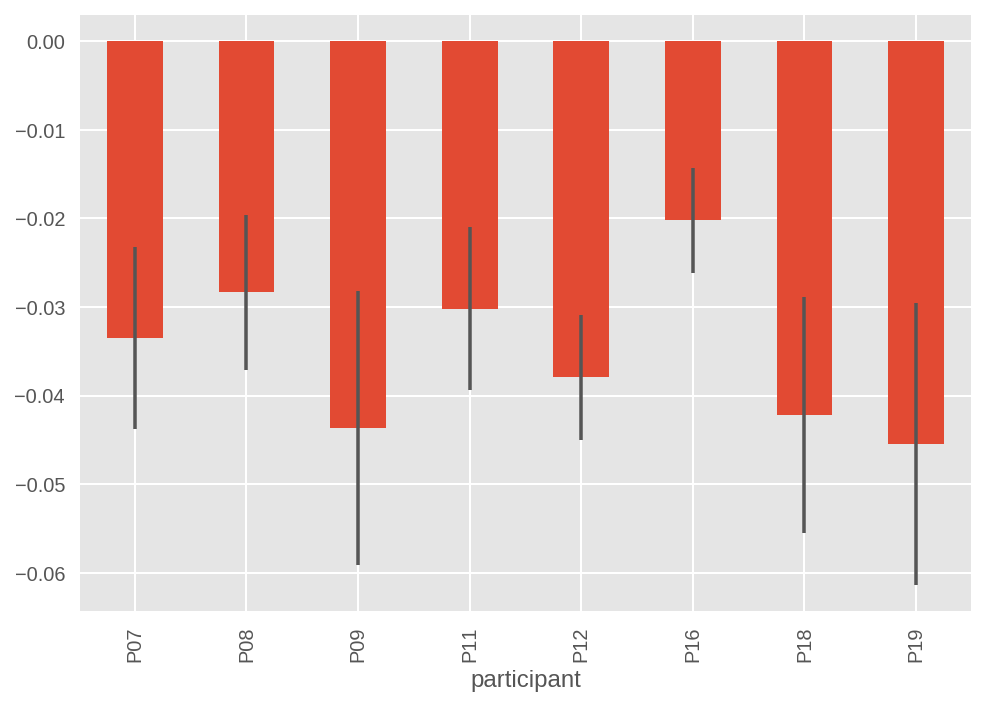

In [7]:
anovaTable.mean(axis = 1).plot(kind = 'bar', yerr = anovaTable.std(axis = 1) / np.sqrt(len(anovaTable.columns)))
plt.show()

## Fixations

In [8]:
cues = [0.353 + n * 0.072 for n in range(8)]
print cues

[0.353, 0.425, 0.497, 0.569, 0.641, 0.713, 0.7849999999999999, 0.857]


In [9]:
# Create a common fixations table

fixations = pd.DataFrame()

for name, subj in d.items():
    for trial in subj['trials'].values():
        to_add = pd.DataFrame(trial['fix'])
        to_add.drop('dispersion', axis = 1, inplace = True)
        to_add['p'] = name
        to_add['condition'] = trial['name'][6:-4]
        sm = trial['startmovement']
        to_add['ro_frame'] = np.where(np.array(sm) == 1)[0][0]
        
        fixations = fixations.append(to_add, ignore_index = True)
        
fixations = fixations[['p', 'condition', 'centre_x', 'centre_z', 'duration', 'start_frame', 'end_frame', 'ro_frame']]
fixations[:5]

,p,condition,centre_x,centre_z,duration,start_frame,end_frame,ro_frame
0,P11,Visible_NoCue_RightToLeft,0.620333,0.316477,0.184615,21,44,934
1,P11,Visible_NoCue_RightToLeft,0.782368,0.313448,0.153846,55,74,934
2,P11,Visible_NoCue_RightToLeft,0.818304,0.321310,0.130769,77,93,934
3,P11,Visible_NoCue_RightToLeft,0.819878,0.321702,0.123077,94,109,934
4,P11,Visible_NoCue_RightToLeft,0.824741,0.326223,0.200000,110,135,934


In [10]:
# Detect the off-screen outliers

fixations['off_screen'] = (fixations.centre_x < 0.34) | (fixations.centre_x > 0.87) | \
    (fixations.centre_z < 0.18) | (fixations.centre_z > 0.48)
    
fixations['off_screen'].value_counts()

False    11102
True        40
Name: off_screen, dtype: int64

In [11]:
# Find the distances between fixations and the closest cue

closest_cue = []
distance = []

for index, row in fixations.iterrows():
    dist = [row['centre_x'] - cue for cue in cues]
    ind, = np.where(np.abs(dist) == min(np.abs(dist)))
    closest_cue.append(ind[0])
    distance.append(dist[ind[0]])
    
fixations['closest_cue'] = closest_cue
fixations['distance_to'] = distance

In [12]:
# Find the reach onset time in frames

x = (0,0,0,0,0,0,0,1,1,1,1,1,0,0,0)

np.where(np.array(x) == 1)[0][0]

7

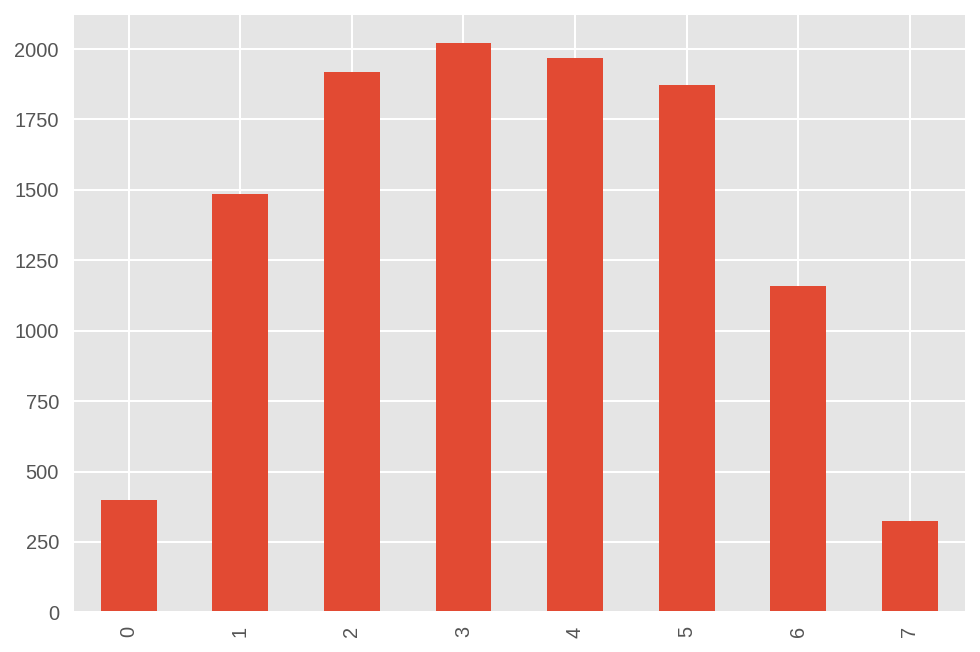

,p,condition,centre_x,centre_z,duration,start_frame,end_frame,ro_frame,off_screen,closest_cue,distance_to
0,P11,Visible_NoCue_RightToLeft,0.620333,0.316477,0.184615,21,44,934,False,4,-0.020667
1,P11,Visible_NoCue_RightToLeft,0.782368,0.313448,0.153846,55,74,934,False,6,-0.002632
2,P11,Visible_NoCue_RightToLeft,0.818304,0.321310,0.130769,77,93,934,False,6,0.033305
3,P11,Visible_NoCue_RightToLeft,0.819878,0.321702,0.123077,94,109,934,False,6,0.034878
4,P11,Visible_NoCue_RightToLeft,0.824741,0.326223,0.200000,110,135,934,False,7,-0.032259


In [13]:
# Number of fixations per closest cue

fixations['closest_cue'].value_counts(sort = False).plot(kind = 'bar')
plt.show()
fixations[:5]

### Fixations' location

In [14]:
# Fixations for occlusion, cue vs no cue, left to right

ocl_fixations = fixations[(fixations['condition'] == 'Occlusion_Cue_LeftToRight') & \
                          (fixations['off_screen'] == False) & \
                          (fixations['start_frame'] < fixations['ro_frame']) &
                          (fixations['start_frame'] > 495)]


onl_fixations = fixations[(fixations['condition'] == 'Occlusion_NoCue_LeftToRight') & \
                          (fixations['off_screen'] == False) & \
                          (fixations['start_frame'] < fixations['ro_frame']) & \
                          (fixations['start_frame'] > 495)]


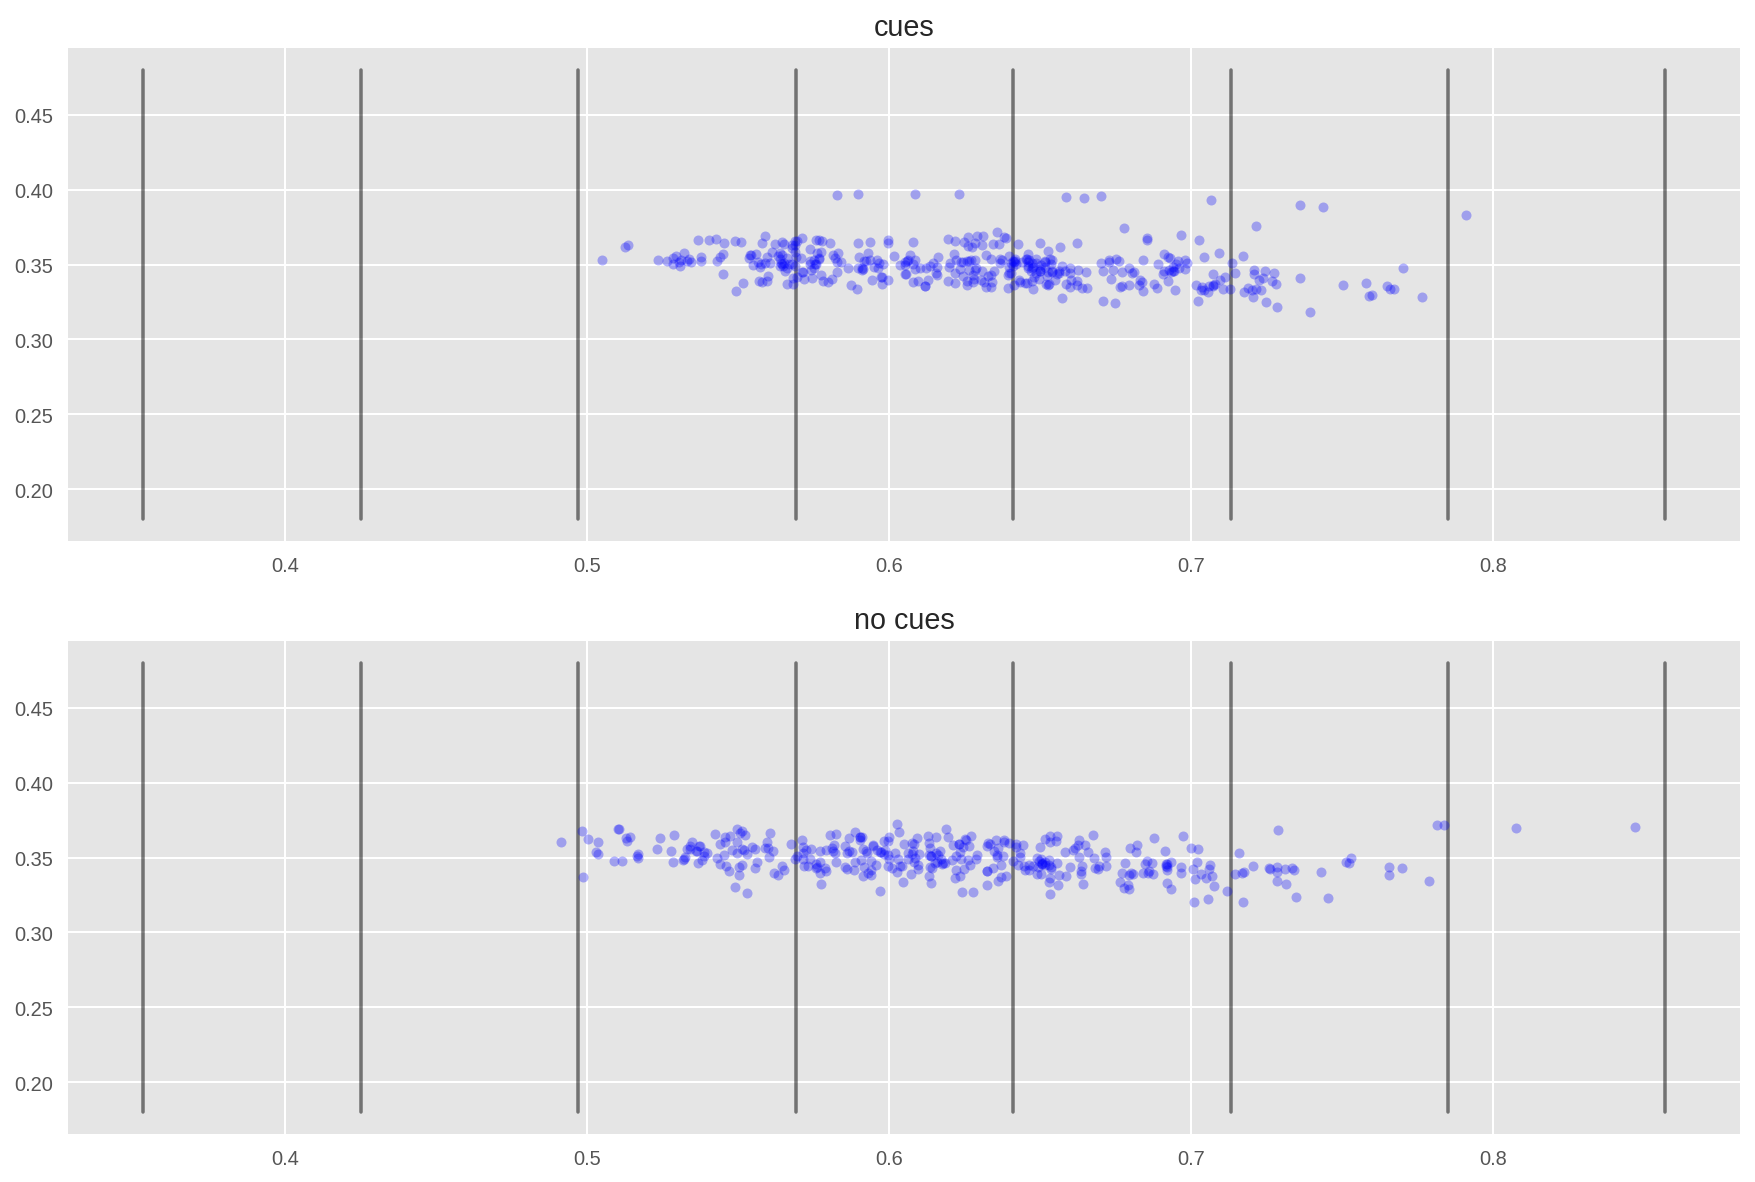

In [15]:
fig = plt.figure(figsize = [15, 10])
ax1 = fig.add_subplot(211)
draw_cues(ax1, ybottom = 0.18, ytop = 0.48)
ax1.plot(ocl_fixations['centre_x'], ocl_fixations['centre_z'], 'b.', alpha = 0.3, markersize = 10)
ax1.set_title('cues')

ax2 = fig.add_subplot(212)
draw_cues(ax2, ybottom = 0.18, ytop = 0.48)
ax2.plot(onl_fixations['centre_x'], onl_fixations['centre_z'], 'b.', alpha = 0.3, markersize = 10)
ax2.set_title('no cues')

plt.show()


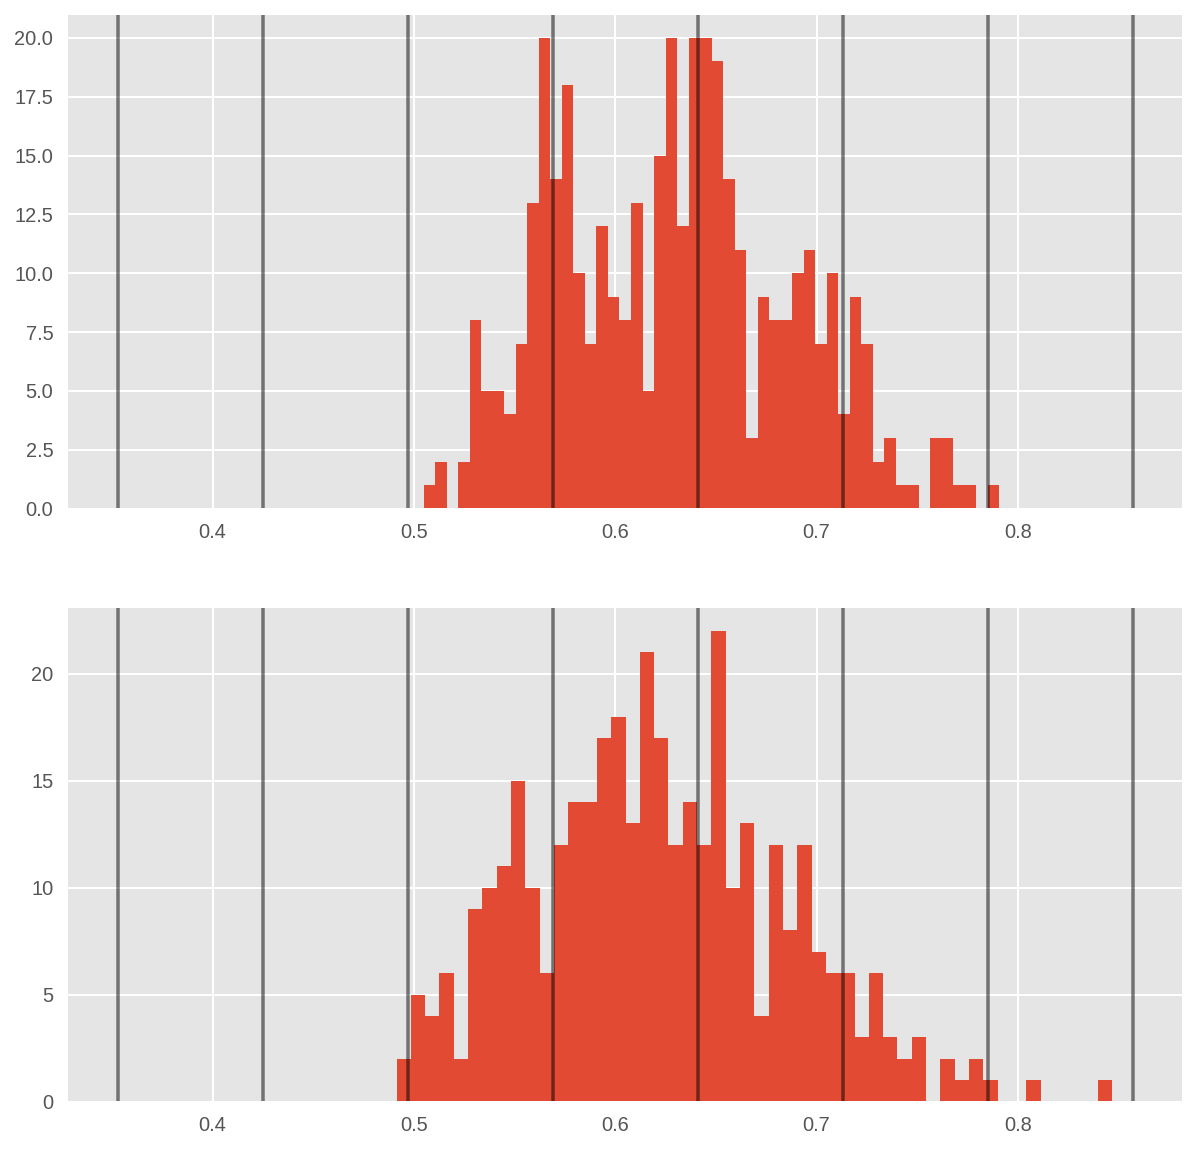

In [16]:
fig = plt.figure(figsize = [10, 10])
ax1 = fig.add_subplot(211)
ax1.hist(ocl_fixations['centre_x'], bins = 50)
draw_cues(ax1)

ax2 = fig.add_subplot(212, sharex = ax1)
ax2.hist(onl_fixations['centre_x'], bins = 50)
draw_cues(ax2)

plt.show()

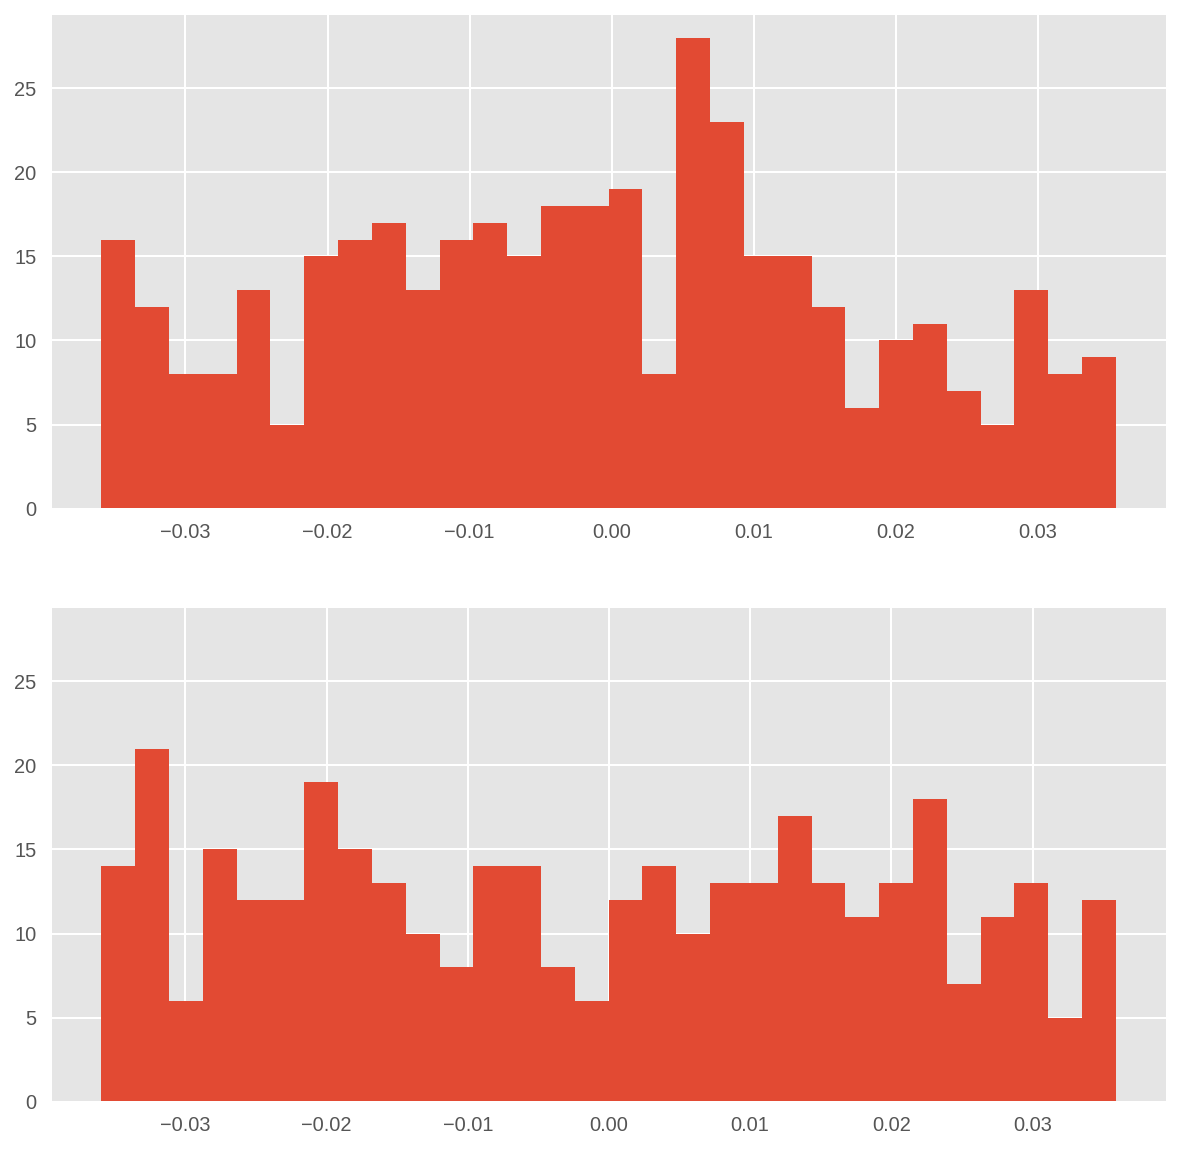

In [17]:
# Overlay the cues & plot the closest fixations. 0 = cue position

# x1 = ocl_fixations[ocl_fixations['closest_cue'] > 2]['distance_to']
# x2 = onl_fixations[onl_fixations['closest_cue'] > 2]['distance_to']

x1 = ocl_fixations['distance_to']
x2 = onl_fixations['distance_to']

fig = plt.figure(figsize = [10, 10])
ax1 = fig.add_subplot(211)
ax1.hist(x1, bins = 30)
ax2 = fig.add_subplot(212, sharey = ax1)
ax2.hist(x2, bins = 30)
plt.show()

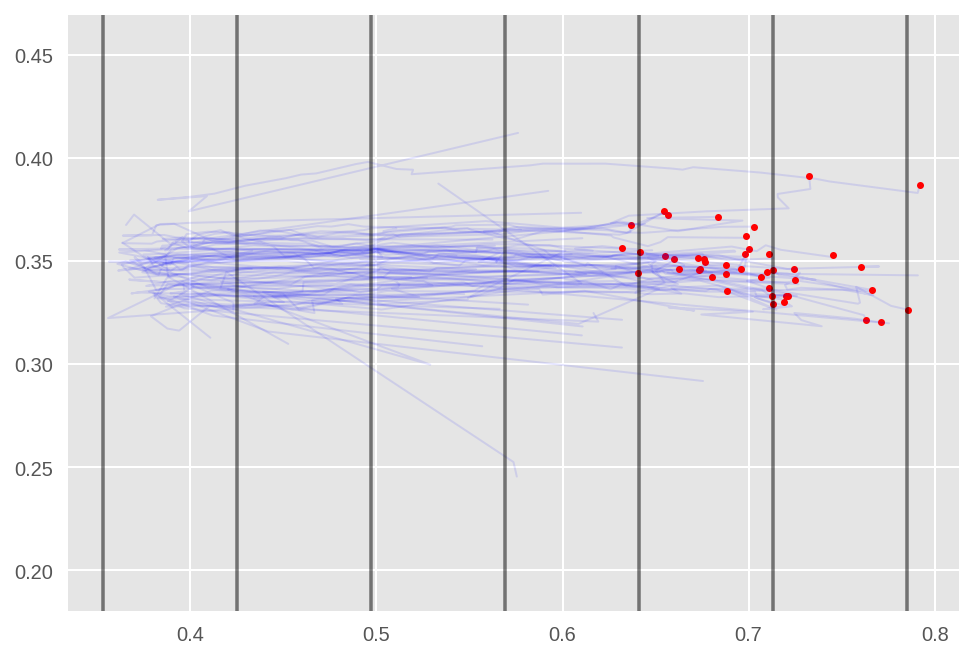

In [18]:

for subj in d.values():
    for trial in subj['trials'].values():
        if 'Occlusion_Cue_LeftToRight' in trial['name']:
            plt.plot(trial['fix']['centre_x'], trial['fix']['centre_z'], 'b-', alpha = 0.1, linewidth = 1)
            plt.plot(trial['fix']['centre_x'][-1], trial['fix']['centre_z'][-1], 'r.')

draw_cues(plt.gca(), ybottom = 0.18, ytop = 0.48)
plt.ylim(0.18, 0.47)
plt.show()

In [19]:
# Kolmogorov-Smirnov two-sample test for ocl vs onl

res = ks_2samp(x1, x2)
print 'ks = {}\np = {}'.format(round(res[0], 4), round(res[1], 4))

ks = 0.0936
p = 0.066


### -------------------- Fixations' duration --------------------

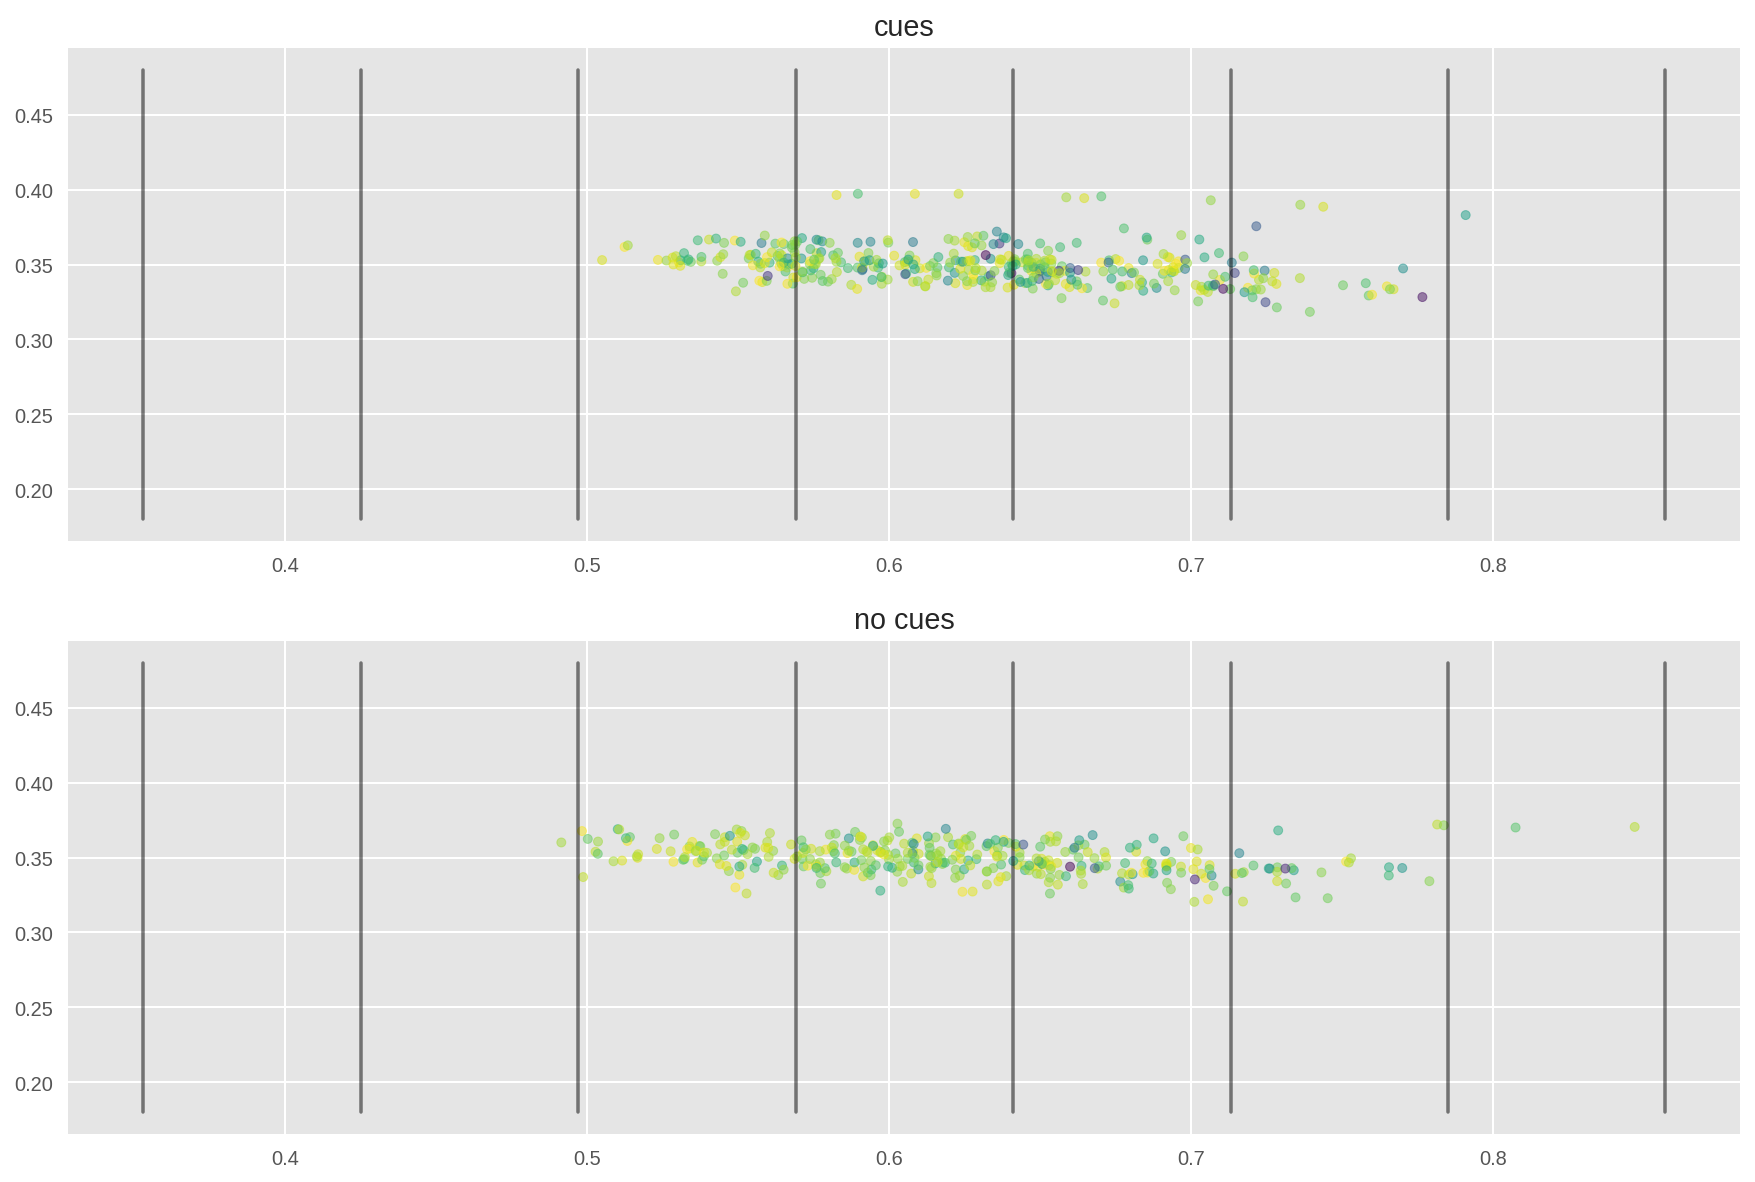

In [20]:
from matplotlib import cm

fig = plt.figure(figsize = [15, 10])
ax1 = fig.add_subplot(211)
draw_cues(ax1, ybottom = 0.18, ytop = 0.48)
ax1.scatter(ocl_fixations['centre_x'], ocl_fixations['centre_z'], c = ocl_fixations['duration'],
            alpha = 0.5, cmap = cm.viridis_r, s = 20)
ax1.set_title('cues')
# ax1.set_xlim(0.5, 0.8)
# ax1.set_ylim(0.3, 0.4)

ax2 = fig.add_subplot(212)
draw_cues(ax2, ybottom = 0.18, ytop = 0.48)
ax2.scatter(onl_fixations['centre_x'], onl_fixations['centre_z'], c = onl_fixations['duration'],
            alpha = 0.5, cmap = cm.viridis_r, s = 20)
ax2.set_title('no cues')

plt.show()

r = -0.094
p = 0.063


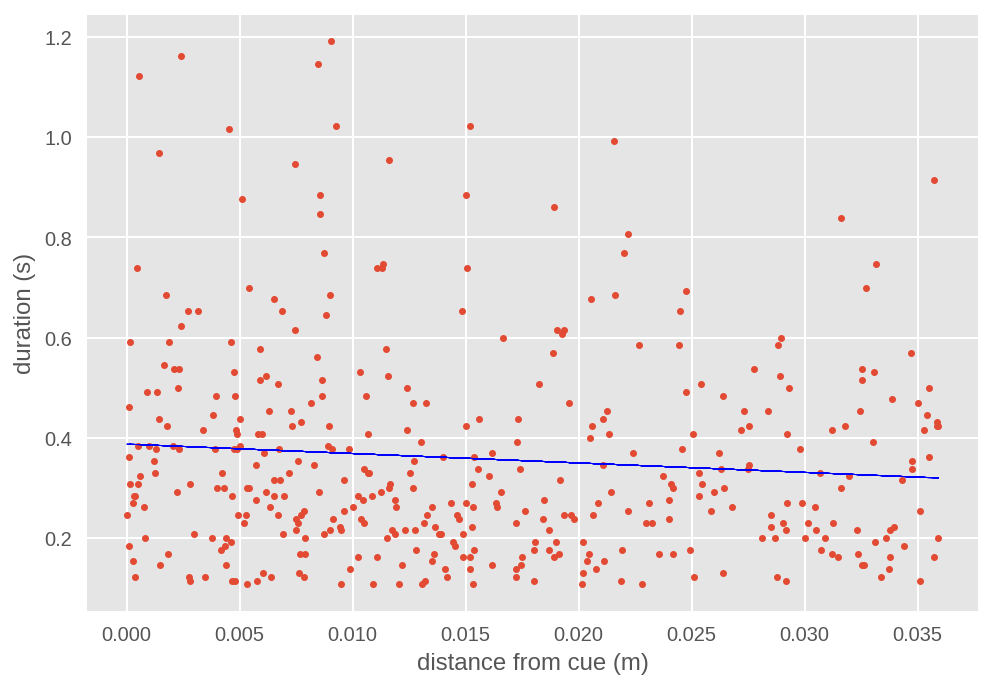

In [21]:
# Linear model duration ~ distance for ocl

from scipy.stats import linregress

slope, intercept, r, p, stderr = linregress(abs(ocl_fixations['distance_to']), ocl_fixations['duration'])
print 'r = {}\np = {}'.format(round(r, 3), round(p, 3))
y = slope * abs(ocl_fixations['distance_to']) + intercept

plt.plot(abs(ocl_fixations['distance_to']), ocl_fixations['duration'], '.')
plt.plot(abs(ocl_fixations['distance_to']), y, 'b-', linewidth = 0.5)
plt.xlabel('distance from cue (m)')
plt.ylabel('duration (s)')
plt.show()

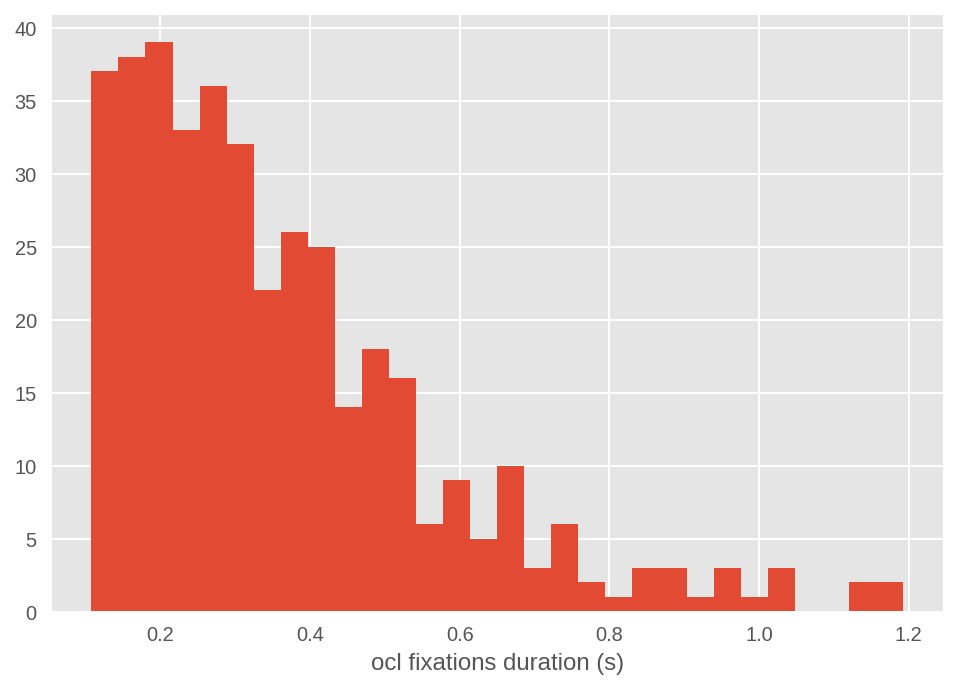

In [22]:
# Distribution of fixations' duration

plt.hist(ocl_fixations['duration'], bins = 30)
plt.xlabel('ocl fixations duration (s)')
plt.show()

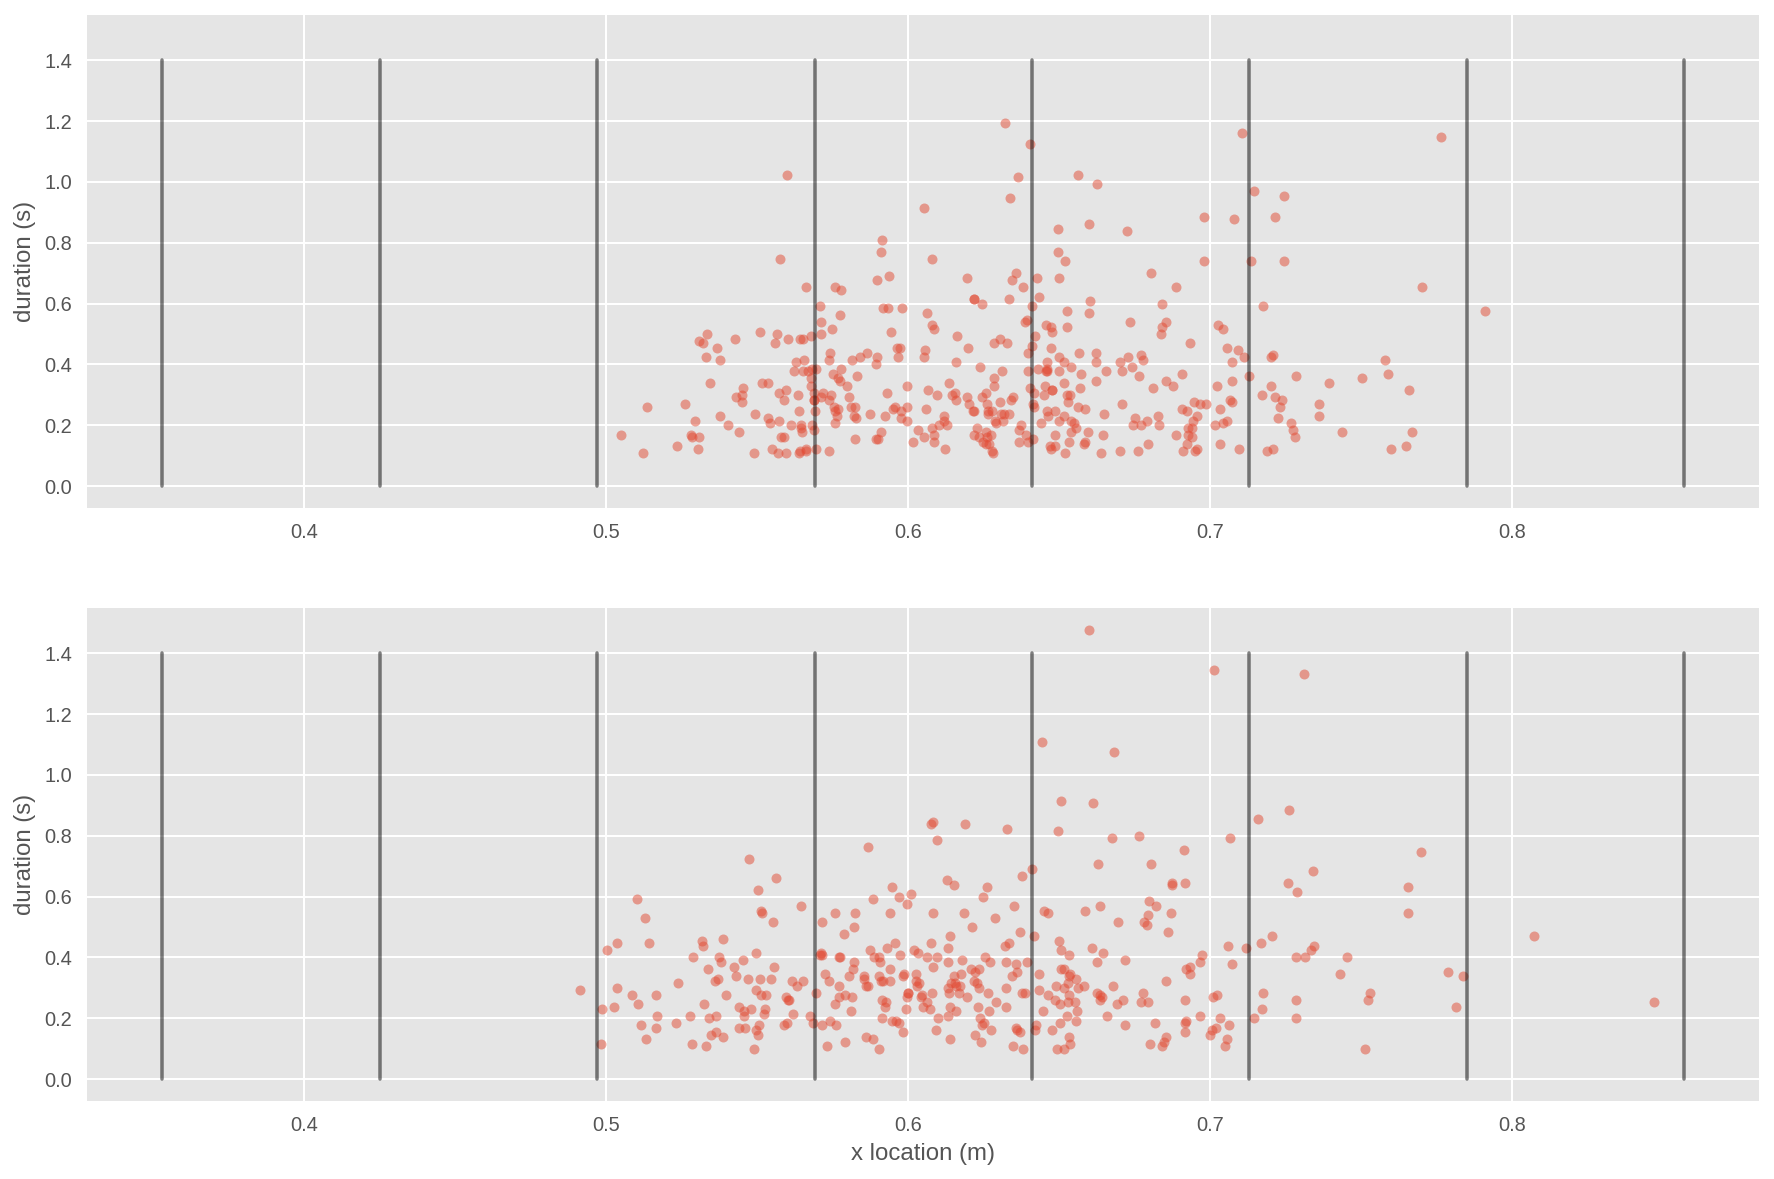

In [23]:
# Fixation duration against location on the x-axis

fig = plt.figure(figsize = [15, 10])

ax1 = fig.add_subplot(211)
ax1.plot(ocl_fixations['centre_x'], ocl_fixations['duration'], '.', markersize = 10, alpha = 0.5)
draw_cues(ax1, ybottom = 0, ytop = 1.4)
ax1.set_ylabel('duration (s)')

ax2 = fig.add_subplot(212, sharex = ax1, sharey = ax1)
ax2.plot(onl_fixations['centre_x'], onl_fixations['duration'], '.', markersize = 10, alpha = 0.5)
draw_cues(ax2, ybottom = 0, ytop = 1.4)
ax2.set_xlabel('x location (m)')
ax2.set_ylabel('duration (s)')

plt.show()

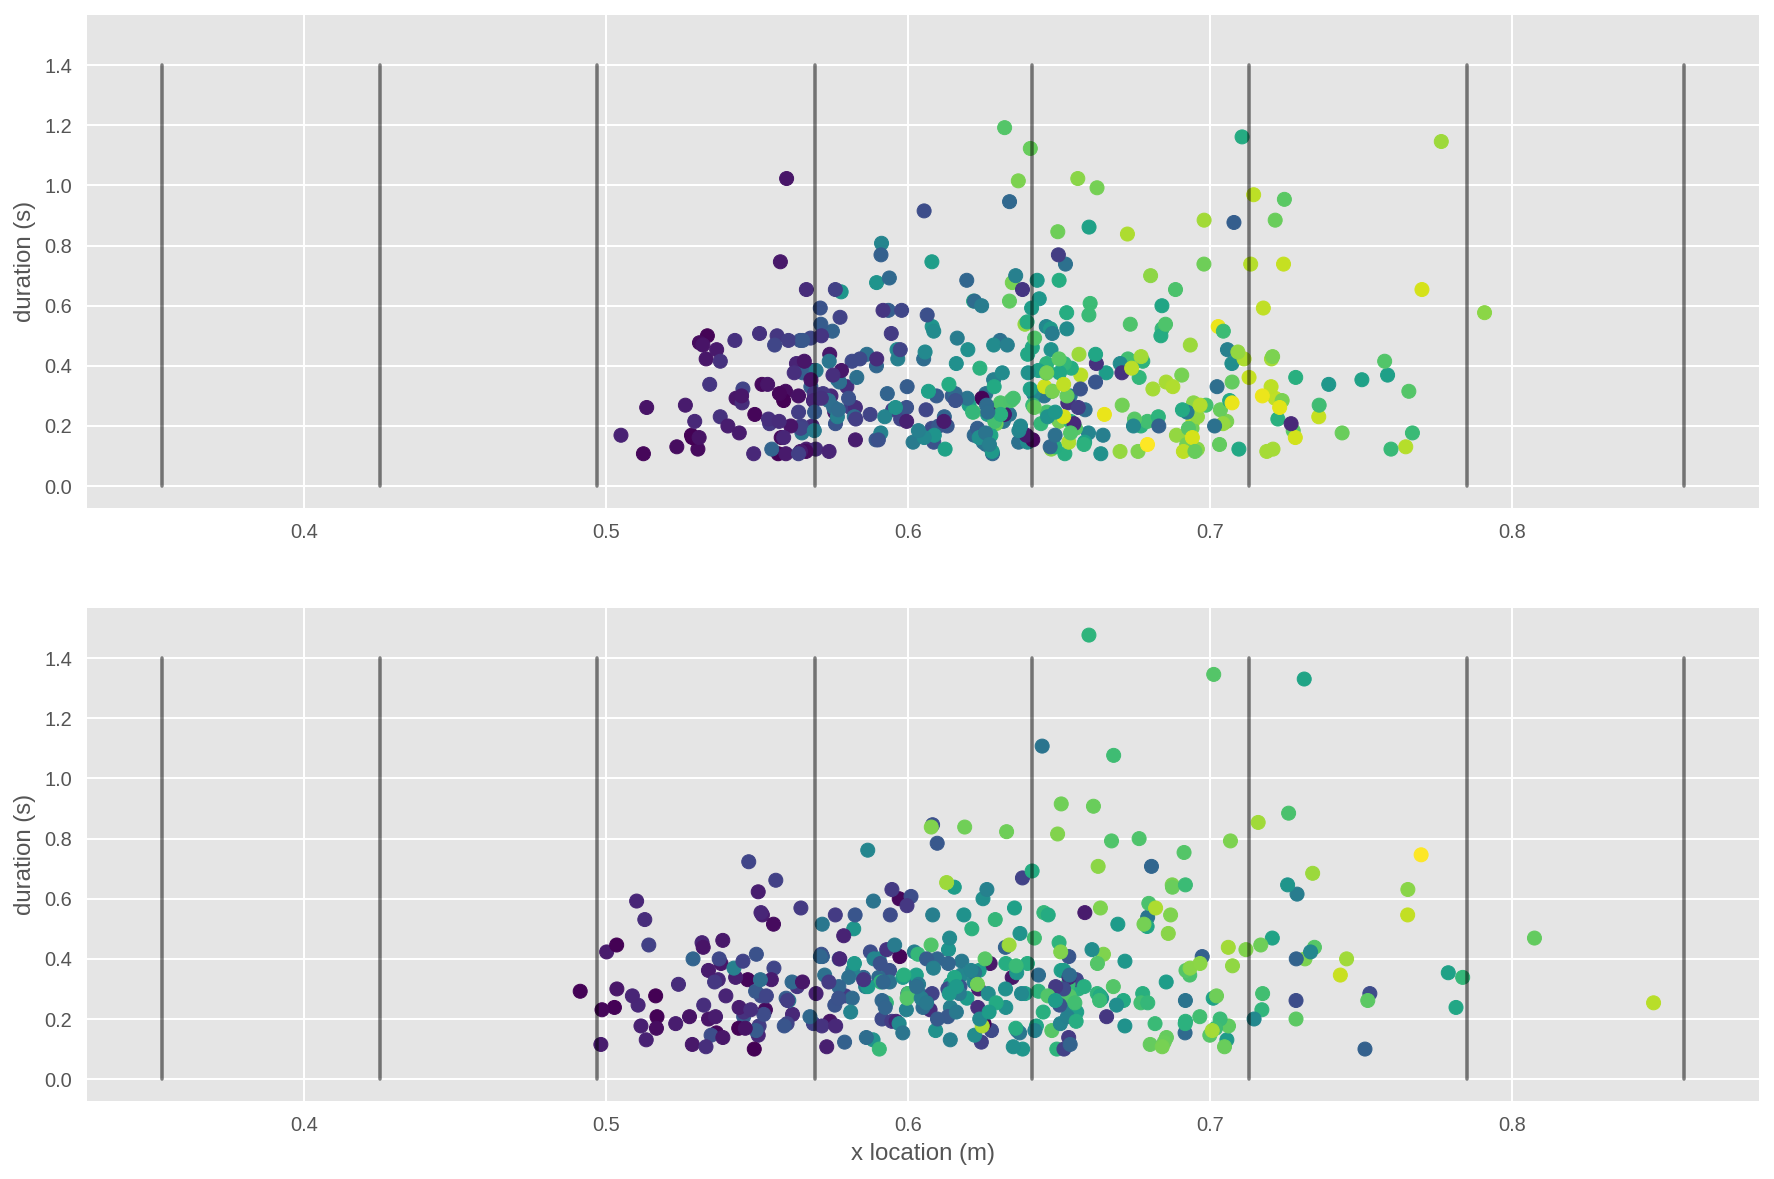

In [24]:
fig = plt.figure(figsize = [15, 10])

ax1 = fig.add_subplot(211)
ax1.scatter(ocl_fixations['centre_x'], ocl_fixations['duration'], c = ocl_fixations['start_frame'], cmap = cm.viridis)
draw_cues(ax1, ybottom = 0, ytop = 1.4)
ax1.set_ylabel('duration (s)')

ax2 = fig.add_subplot(212, sharex = ax1, sharey = ax1)
ax2.scatter(onl_fixations['centre_x'], onl_fixations['duration'], c = onl_fixations['start_frame'], cmap = cm.viridis)
draw_cues(ax2, ybottom = 0, ytop = 1.4)
ax2.set_xlabel('x location (m)')
ax2.set_ylabel('duration (s)')

plt.show()

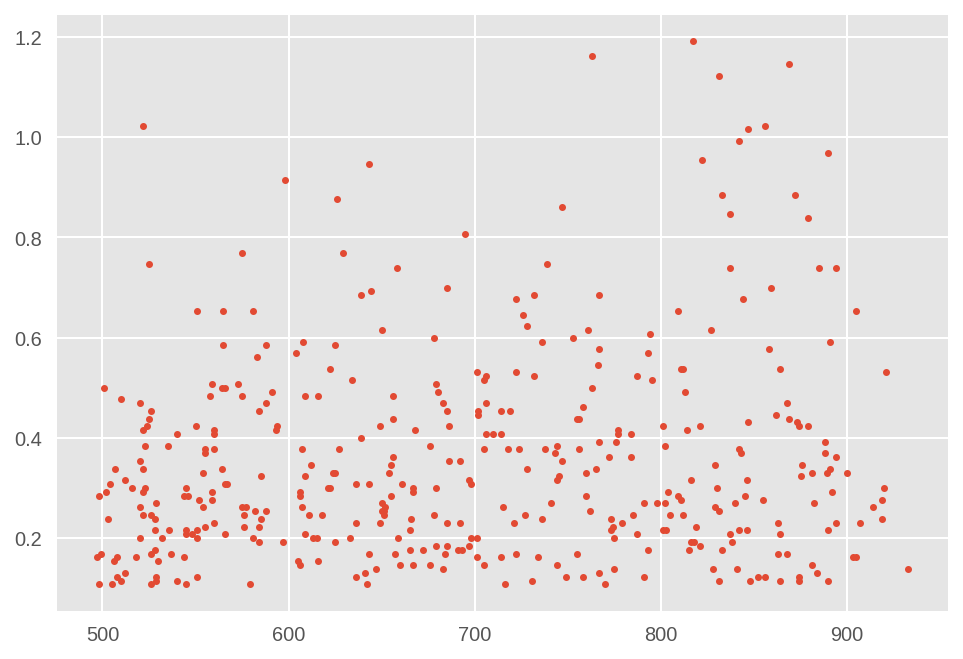

In [25]:
plt.plot(ocl_fixations['start_frame'], ocl_fixations['duration'], '.')
plt.show()

## Reaching movement

In [31]:
def auc(x, y, z):
    d = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
    d = sum(d)
    return d

In [50]:
# Find the reach travel distance for wrist

td = pd.DataFrame(columns = ['participant', 'condition', 'travel_distance'])

for pid, subj in d.items():
    for trial in subj['trials'].values():
        
        x = trial[markers[pid]['wrist'] + 'x']
        y = trial[markers[pid]['wrist'] + 'y']
        z = trial[markers[pid]['wrist'] + 'z']
        
        dist = auc(x, y, z)
        cond = trial['name'][6:-4]
        
        to_add = pd.Series([pid, cond, dist], td.columns.values.tolist())
        td = td.append(to_add, ignore_index = True)
        
td[:5]

,participant,condition,travel_distance
0,P11,Visible_NoCue_RightToLeft,0.451970
1,P11,Visible_NoCue_RightToLeft,0.455537
2,P11,Visible_NoCue_LeftToRight,0.404022
3,P11,Visible_NoCue_LeftToRight,0.400822
4,P11,Visible_NoCue_LeftToRight,0.389036


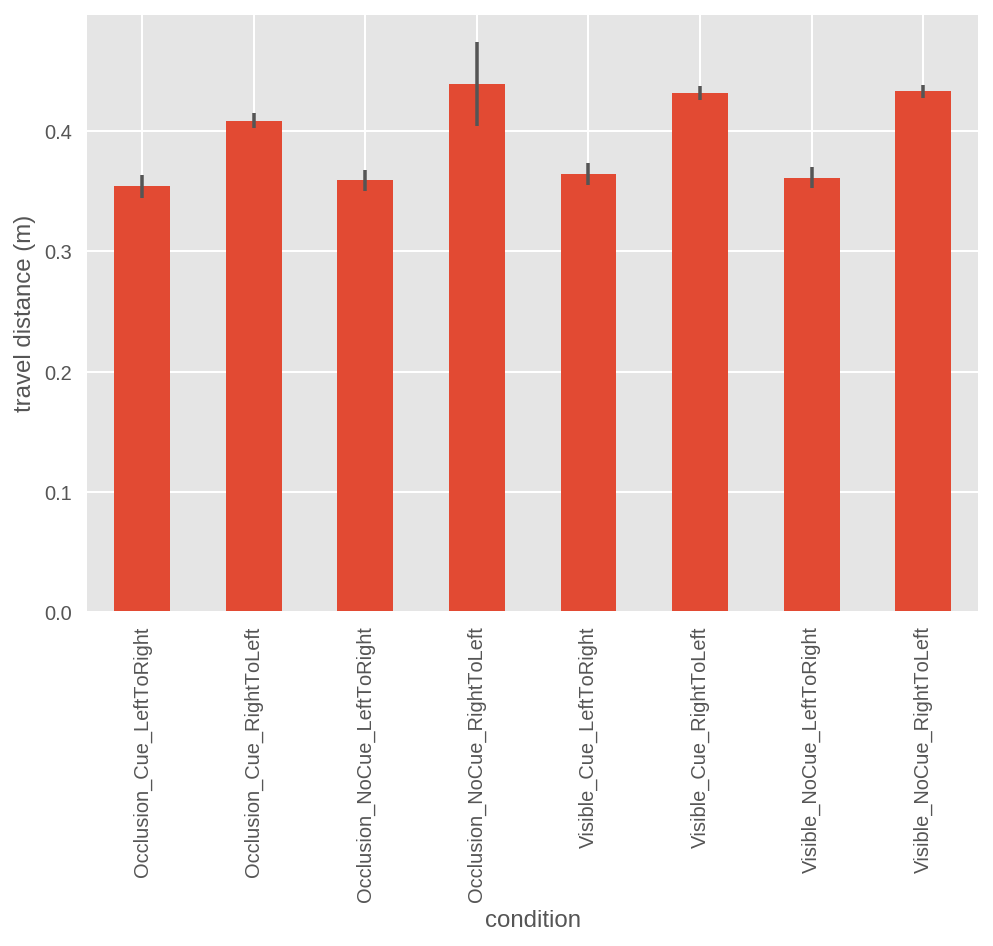

In [90]:
a = td.groupby(['participant', 'condition']).aggregate(np.mean).reset_index()
b = a.pivot(index = 'participant', columns = 'condition', values = 'travel_distance')
c = b.mean(axis = 0)
# b.loc[:, ['Occlusion_Cue_LeftToRight', 'Visible_Cue_LeftToRight']].plot(kind = 'bar')
c.plot(kind = 'bar',  yerr = b.std(axis = 0) / np.sqrt(len(b)))
plt.ylabel('travel distance (m)')
plt.show()

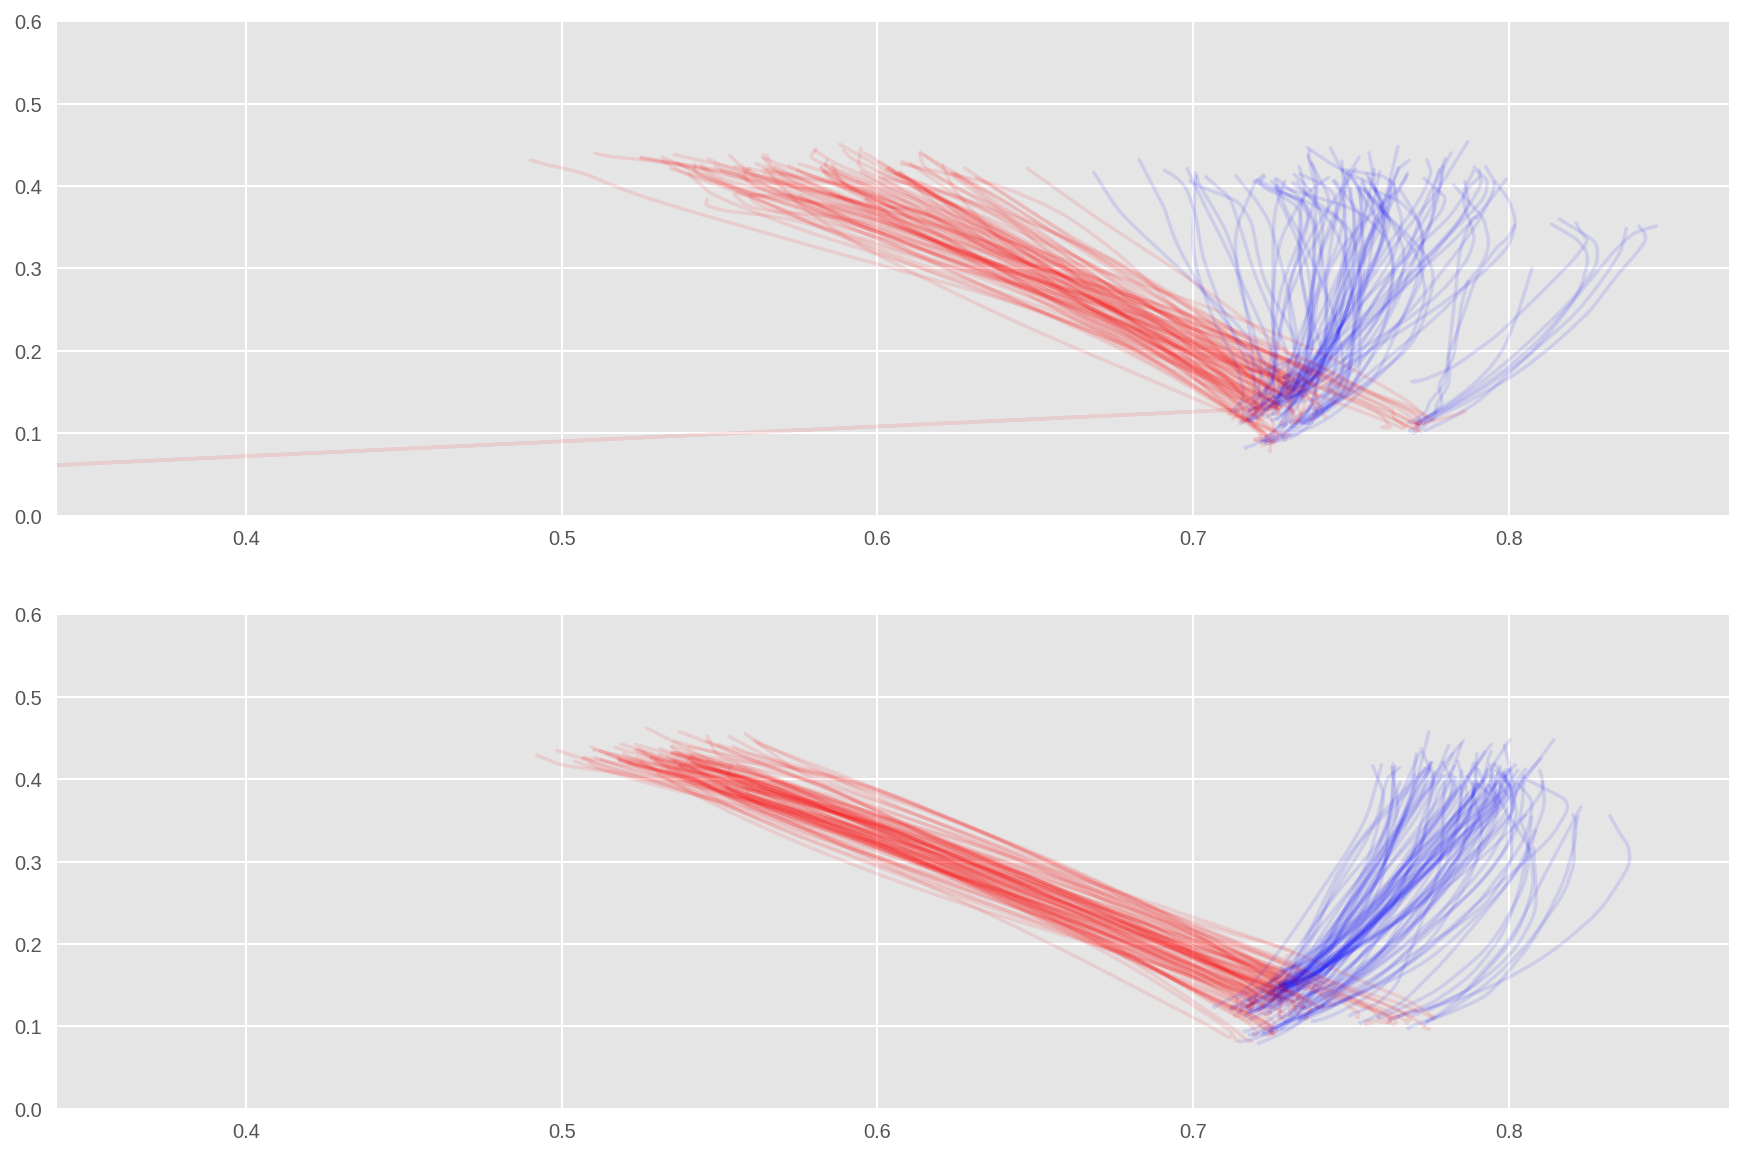

In [106]:
# Reach trajectories on x-y axes

fig = plt.figure(figsize = [15, 10])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for pid, subj in d.items():
    for trial in subj['trials'].values():
        x = trial[markers[pid]['wrist'] + 'x']
        y = trial[markers[pid]['wrist'] + 'y']
        if 'Occlusion_Cue_LeftToRight' in trial['name'] or 'Occlusion_NoCue_LeftToRight' in trial['name']:
            ax1.plot(x, y, color = 'b', alpha = 0.1)
        elif 'Occlusion_Cue_RightToLeft' in trial['name'] or 'Occlusion_NoCue_RightToLeft' in trial['name']:
            ax1.plot(x, y, color = 'r', alpha = 0.1)
        elif 'Visible_Cue_LeftToRight' in trial['name'] or 'Visible_NoCue_LeftToRight' in trial['name']:
            ax2.plot(x, y, color = 'b', alpha = 0.1)
        elif 'Visible_Cue_RightToLeft' in trial['name'] or 'Visible_NoCue_RightToLeft' in trial['name']:
            ax2.plot(x, y, color = 'r', alpha = 0.1)

ax1.set_ylim(0, 0.6)
ax2.set_ylim(0, 0.6)
ax1.set_xlim(0.34, 0.87)
ax2.set_xlim(0.34, 0.87)
plt.show()